<a href="https://colab.research.google.com/github/AVISHKAR0707/ArrayOfObjectsUsingConceptOfInheritance/blob/main/Avishkar'sFaceRecognitionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

In [2]:
!mkdir known

In [ ]:
!wget https://static.dezeen.com/uploads/2021/06/elon-musk-architect_dezeen_1704_col_2.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/1674815862879178752/nTGMV1Eo_400x400.jpg -O known/bill.jpg
!wget https://www.whitehouse.gov/wp-content/uploads/2021/01/44_barack_obama.jpg -O known/obama.jpg
!wget https://i.pinimg.com/564x/e0/24/1d/e0241db558b2c1563c7af83bd621c34c.jpg -O known/akshay.jpg
!wget https://i.pinimg.com/564x/20/40/b0/2040b0f1299e751853d97a394511c8c0.jpg -O known/akshay.jpg
!wget https://i.pinimg.com/564x/32/23/82/322382cbdb0e28524adcada9f36aa7e7.jpg -O known/akshay.jpg
!wget https://i.dawn.com/primary/2022/01/61e2d044a2134.jpg -O known/virat.jpg -O known/virat.jpg
!wget https://drop.ndtv.com/albums/SPORTS/world-cup-2023-_638318468932740488/638318468981713233.png -O known/virat.jpg
!wget https://i.pinimg.com/564x/2d/a1/90/2da190d4f080073ec739e35fc357c55a.jpg -O known/virat.jpg


In [ ]:
!mkdir unknown

In [ ]:

!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://i.pinimg.com/750x/3f/56/3b/3f563b272f39542517e84e7328167422.jpg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg
!wget https://images.indianexpress.com/2018/08/elon-musk-ap-759.jpg -O unknown/5.jpg
!wget https://sportscafe.in/img/es3-cfill-w800-h400-gn/articles/Cricket_1/newjersey.jpeg -O unknown/6.jpg
!wget https://static.dezeen.com/uploads/2021/06/elon-musk-architect_dezeen_1704_col_2.jpg -O unknown/7.jpg
!wget https://i.pinimg.com/564x/90/a8/16/90a8163e2b9adceb6feadd610a08b987.jpg -O unknown/7.jpg



Processing 3.jpg


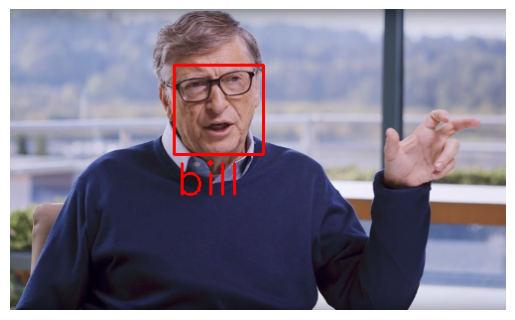

Processing 6.jpg


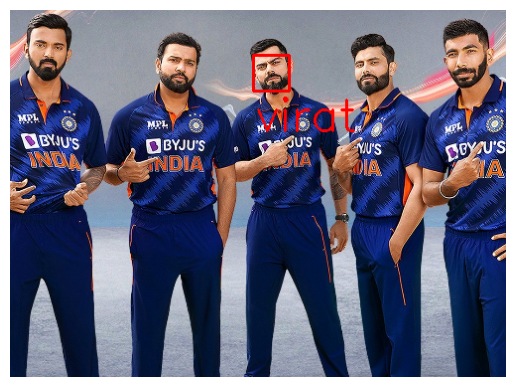

Processing 5.jpg


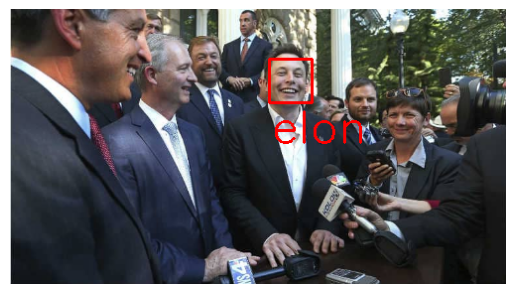

Processing 7.jpg


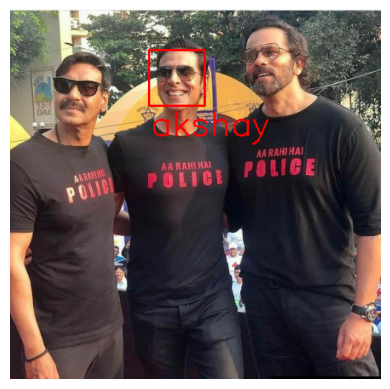

Processing 2.jpg


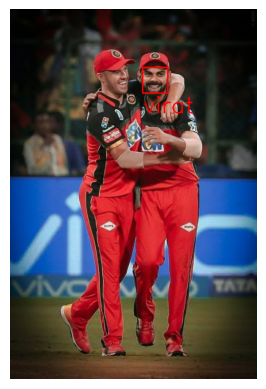

Processing 1.jpg


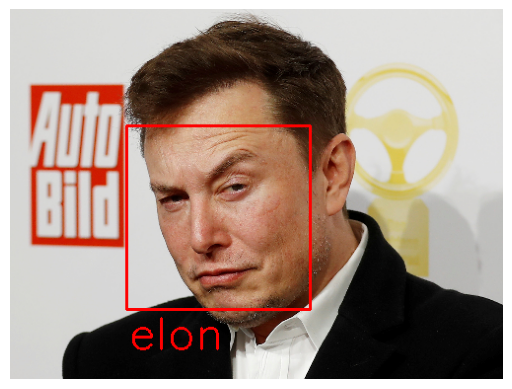

Processing 4.jpg


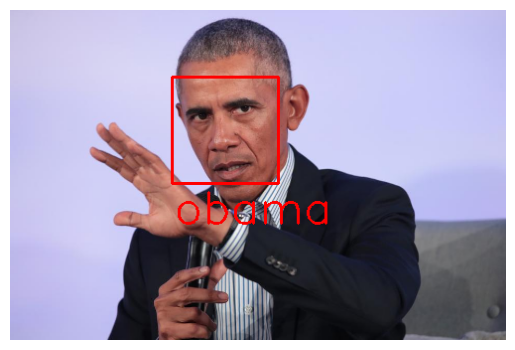

In [38]:
import face_recognition
import cv2
import os
import matplotlib.pyplot as plt

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    face_locations = face_recognition.face_locations(img)
    face_encodings = face_recognition.face_encodings(img, face_locations)

    for face_encoding, face_location in zip(face_encodings, face_locations):
        results = face_recognition.compare_faces(known_encodings, face_encoding)

        for i, result in enumerate(results):
            if result:
                name = known_names[i]
                (top, right, bottom, left) = face_location
                cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
                cv2.putText(img, name, (left+2, bottom+40), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
